In [1]:
#QUESTION 1
# Import libraries

import numpy as np # creating and manipulating arrays
import matplotlib.pyplot as plt # visualizing data
import sklearn # regression models
import statsmodels.api as sm 
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("garments_worker_productivity.csv", header = 0, index_col = 0)

df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625


In [4]:
# Generate inputs and outputs

np.random.seed(0) 

data = 2 * np.random.rand(100, 1)
output = 4 + 3 * data + np.random.randn(100, 1)

data_new = np.array([[0], [2]])

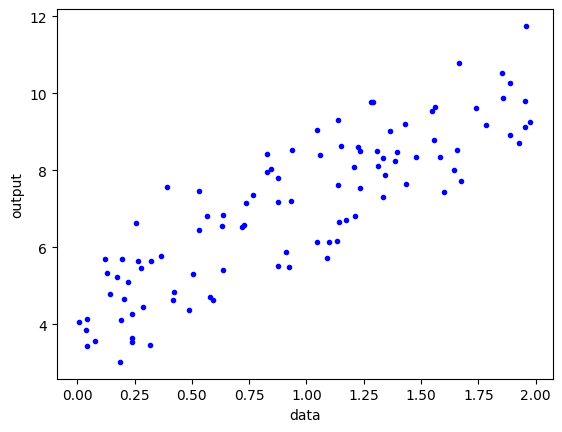

In [5]:
# Visualize the data 

plt.plot(data, output, "b.")
plt.xlabel("data", fontsize=10)
plt.ylabel("output", fontsize=10)
plt.show()

In [6]:
data_ols = sm.add_constant(data) # Add constant for the first value (intercept)
model = sm.OLS(endog= output, exog = data_ols)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     289.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           5.29e-31
Time:                        21:26:13   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2222      0.193     21.843      0.0

In [7]:
data_new_ols = sm.add_constant(data_new)
ols_output = results.get_prediction(data_new_ols).summary_frame(alpha=0.05)  

ols_output_list = ols_output['mean'].tolist()
ols_output_list

[4.222151077447229, 10.159086098849265]

In [8]:
#Question 2
# Encoding --> convert categorical into quantitative

df['quarter'] = df['quarter'].astype('category')
df['quarter'] = df['quarter'].cat.codes

df['department'] = df['department'].astype('category')
df['department'] = df['department'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
1/1/2015,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1/1/2015,0,1,3,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
1/1/2015,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [9]:
# Find missing values

df.describe()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,1.399332,1.369256,2.534670,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,1.215535,0.805909,1.714538,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.000000,0.000000,0.000000,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.000000,1.000000,1.000000,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,1.000000,2.000000,3.000000,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2.000000,2.000000,4.000000,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,4.000000,2.000000,5.000000,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [10]:
# Create inputs and output

y = df['actual_productivity']
X = df.drop('actual_productivity',axis=1)
X = df.drop('wip',axis=1)
X

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,
1/1/2015,0,2,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1/1/2015,0,1,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
1/1/2015,0,2,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,0,2,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
1/1/2015,0,2,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/11/2015,1,0,5,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
3/11/2015,1,0,5,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
3/11/2015,1,0,5,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625


In [11]:
model = sm.OLS(endog= y, exog= X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     actual_productivity   R-squared (uncentered):                   1.000
Model:                             OLS   Adj. R-squared (uncentered):              1.000
Method:                  Least Squares   F-statistic:                          5.343e+26
Date:                 Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                         21:28:05   Log-Likelihood:                          32770.
No. Observations:                 1197   AIC:                                 -6.551e+04
Df Residuals:                     1184   BIC:                                 -6.545e+04
Df Model:                           13                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [12]:
X = X.drop('quarter',axis=1)
X = X.drop('department',axis=1)
X = X.drop('day',axis=1)
X = X.drop('team',axis=1)
X = X.drop('targeted_productivity',axis=1)
X = X.drop('smv',axis=1)
X = X.drop('incentive',axis=1)
X = X.drop('idle_men',axis=1)
X = X.drop('no_of_style_change',axis=1)
X = X.drop('no_of_workers',axis=1)

X

,over_time,idle_time,actual_productivity
date,,,
1/1/2015,7080,0.0,0.940725
1/1/2015,960,0.0,0.886500
1/1/2015,3660,0.0,0.800570
1/1/2015,3660,0.0,0.800570
1/1/2015,1920,0.0,0.800382
...,...,...,...
3/11/2015,960,0.0,0.628333
3/11/2015,960,0.0,0.625625
3/11/2015,960,0.0,0.625625


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [14]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#y_pred = pd.DataFrame(y_pred, columns = ['Predictions'])

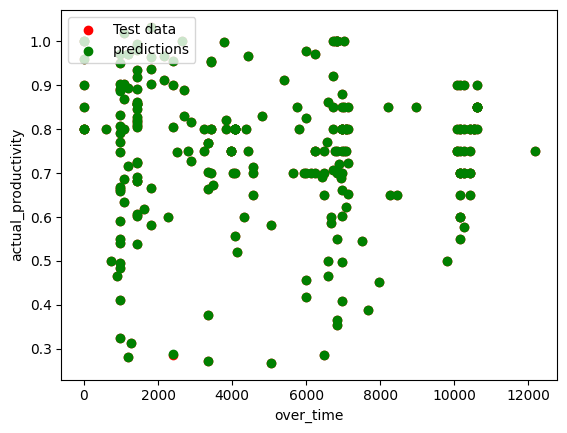

In [15]:
plt.scatter(X_test['over_time'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['over_time'], y_pred, color = "green", label = "predictions")
plt.xlabel("over_time")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [16]:
val_error = mean_squared_error(y_test, y_pred)

y_train_pred = reg.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

# Get validation scores
scores = cross_validate(reg, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = reg.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  2.2557764005749115e-09
Validation MSE:  0.9999719478636683
R-squared: 0.9999999098456668


In [17]:
#Question 3
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(data, output)
y_pred = reg.predict(data_new)

y_pred

/opt/anaconda3/envs/BUSA597/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 4.19942039, 10.10769047])

NameError: name 'sk_output' is not defined

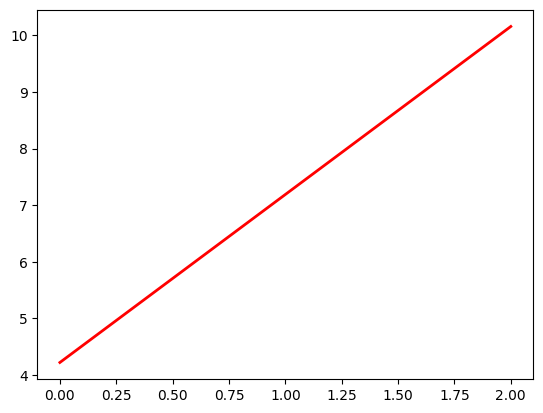

In [19]:
plt.plot(data_new, ols_output_list, "r-", linewidth=2, label="Statmodels Predictions")
plt.plot(data_new, sk_output, "g-", linestyle='dashed',  linewidth=2, label="Sklearn Predictions")
plt.plot(data_new, y_pred, "black", linestyle='dashdot',  linewidth=4, label="SGDRegressor Predictions")


plt.plot(data, output, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [21]:
#QUESTION 4

df['quarter'] = df['quarter'].astype('category')
df['quarter'] = df['quarter'].cat.codes

df['department'] = df['department'].astype('category')
df['department'] = df['department'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

y = df['actual_productivity']
X = df.drop('actual_productivity',axis=1)
X = df.drop('wip',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .2, random_state = 42)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_val_poly = poly_features.fit_transform(X_val)


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

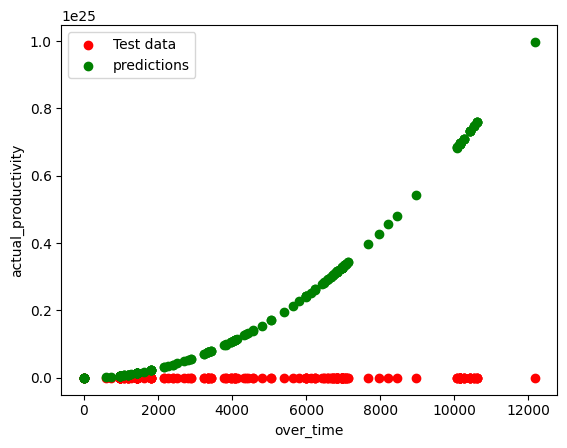

In [25]:
plt.scatter(X_test['over_time'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['over_time'], poly_test_pred, color = "green", label = "predictions")
plt.xlabel("over_time")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [26]:
#QUESTION 5

df['quarter'] = df['quarter'].astype('category')
df['quarter'] = df['quarter'].cat.codes

df['department'] = df['department'].astype('category')
df['department'] = df['department'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

y = df['actual_productivity']
X = df.drop('actual_productivity',axis=1)
X = df.drop('wip',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .2, random_state = 42)

In [27]:
# LASSO REGRESSION

lasso = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l1", max_iter=1000, tol=1e-3, random_state=42))
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)
lasso_val_pred = lasso.predict(X_val)

val_error = mean_squared_error(y_val, lasso_val_pred)
train_error = mean_squared_error(y_train, lasso_train_pred)

# Get validation scores
scores = cross_validate(lasso, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  69954106327734.695
Validation MSE:  -227128641.0852305
R-squared: -6.4762190463662024e+16


In [28]:
# ELASTICITY NET
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  70329492557969.86
Validation MSE:  -243844788.7226063
R-squared: -6.510970150285308e+16


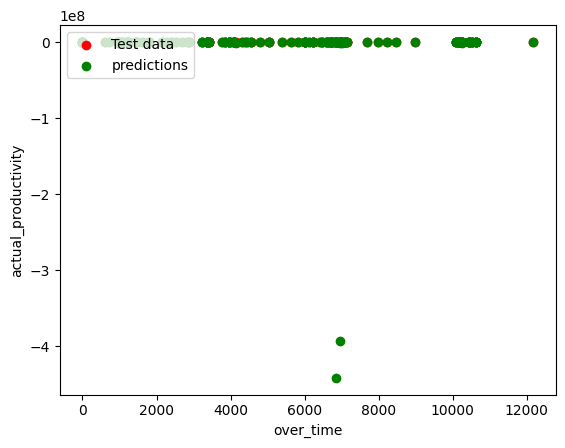

In [29]:
#RIDGE REGRESSION

ridge = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l2", max_iter=1000, tol=1e-3, random_state=42))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

plt.scatter(X_test['over_time'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['over_time'], y_pred, color = "green", label = "predictions")
plt.xlabel("over_time")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# The best model is the linear polynomial regression.